# Executive Summary

This report analyses the top topics of news headlines in Australia. Each of the news headline will be analysed using NMF topic modelling algorithm to cluster the keywords. The cluster of keywords will be used to derive the topic title. Each of the question in this section will help public news services, such as ABC news, to focus on the usage of news headlines to get more customer views. It also assists news services to ensure that they provide news article which align with their readers' interest. Furthermore, the result of this report may help businesses to understand the concerns that the nations have and deliver services or products which intended to solve and relieve the concern. The following business concerns are the primary focus in this report:
   1. What is the top Australian news topics over the past 10 years? The data of ABC news headlines are collected from from [Kaggle](https://www.kaggle.com/therohk/million-headlines). Each news headline will be analysed and assigned to the topics.
   2. What might be the national conversation by analysing the news headlines? In attempt to analyse the national conversation, this report will collect additional data to supplement the analysis. The data is collected from [Australia Government Portal](https://data.gov.au/dataset/ds-dga-316060ae-e49d-4e39-949a-ed3fdaede18d/details?q=abc%20news) which provides the additional information on the traffic of the news headlines in May 2016.

From the analysis of topic frequency, this report found that Australia top three news topics are government policies, sports and accidents. Australians were interested in the news which may affect their daily lives such as new rules from its government. Furthermore, entertainment news such as sports were also the topic of interest in Australia. The report discovered positive relationship between the frequency and number of views of the topics. It might indicate that the more news articles to be published, the more people viewed the topic. In some cases, this report found that some topics were less frequent than other topics but had more views count. This would be a focus point for ABC News to publish more articles on these topics to increase its customer base. Businesses also gained insights from this report. Having a knowledge of topic, such as rugby and cricket, was one of the interests in Australia, it gave opportunity for businesses to review their business plan and open business on sport field. 


# Australia News Headline: Analysing ABC News Headlines for National Conversation

# 1. Top News Topics Analysis
## 1.1 Loading The Data

In [1]:
import pandas as pd             
import matplotlib.pyplot as plt
import seaborn as sns    
import numpy as np
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

In [2]:
news_headline=pd.read_csv('data/abc/abcnews-date-text.csv', index_col=False)
#To show full value headline_text
pd.set_option('max_colwidth', 100)
news_headline

#Change the string to date format.
news_headline['publish_date']=pd.to_datetime(news_headline['publish_date'], format='%Y%m%d')

#Get the data over the last decade 01/01/2010-31/12/2019
news_headline=news_headline.loc[news_headline['publish_date']>='2010-01-01']
news_headline.reset_index(drop=True,inplace=True)
news_headline

,publish_date,headline_text
0,2010-01-01,12m degas stolen from museum
1,2010-01-01,17 die in bangladesh bus crash
2,2010-01-01,2010 to be drier after very wet 2009
3,2010-01-01,37 catholic workers killed worldwide
4,2010-01-01,600 hurt in philippine new year revelry
5,2010-01-01,abbott vows to turn back asylum seekers
6,2010-01-01,accused refused bail over deakin break in
7,2010-01-01,agforce opposes great barrier reef run off
8,2010-01-01,airport security stripped bare
9,2010-01-01,alcohol related injuries flood qld emergency wards


In [3]:
#Check if there is duplicated headlines: Result: no duplicated rows
duplicateheadlines = news_headline[news_headline.duplicated()]
duplicateheadlines

,publish_date,headline_text


In [4]:
news_headline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 675713 entries, 0 to 675712
Data columns (total 2 columns):
publish_date     675713 non-null datetime64[ns]
headline_text    675713 non-null object
dtypes: datetime64[ns](1), object(1)
memory usage: 10.3+ MB


## 1.2. Data Preprocessing

In [5]:
#Create a list from headline text column
headlinelist=news_headline['headline_text'].values.tolist()
headlinelist

['12m degas stolen from museum',
 '17 die in bangladesh bus crash',
 '2010 to be drier after very wet 2009',
 '37 catholic workers killed worldwide',
 '600 hurt in philippine new year revelry',
 'abbott vows to turn back asylum seekers',
 'accused refused bail over deakin break in',
 'agforce opposes great barrier reef run off',
 'airport security stripped bare',
 'alcohol related injuries flood qld emergency wards',
 'all eyes on belgian comeback queens',
 'anger as centrelink fast tracks repayments',
 'another asylum seeker boat intercepted',
 'arsenal re signs young gun diaby',
 'art exhibit set to boost local economy',
 'australia brings in 2010 with a bang',
 'australias coal addiction set in train 30 years ago',
 'birt naved save panicking tigers',
 'blanchett extends stay at theatre company',
 'blaze leads nbl into 2010',
 'body found inside incinerated car',
 'body of diver found off wa',
 'bomb suspect began journey in ghana',
 'boosted police presence after family feud',
 'bo

In [6]:
#Tokenize and Lemmatisation: Used for preprocess text string. Tokenize will split the words and Lemmatisation will 
    #group all similar words regardless of tenses, plural of the tokennize word
    
tokennizelist=[]
lm = WordNetLemmatizer()

for sentence in headlinelist:
    lemlist=[]
    sentence=sentence.lower()
    sentence=word_tokenize(sentence)
    for words in sentence:
        lemlist.append(lm.lemmatize(words))
    tokennizelist.append(lemlist)


In [7]:
tokennizelist[:10]

[['12m', 'degas', 'stolen', 'from', 'museum'],
 ['17', 'die', 'in', 'bangladesh', 'bus', 'crash'],
 ['2010', 'to', 'be', 'drier', 'after', 'very', 'wet', '2009'],
 ['37', 'catholic', 'worker', 'killed', 'worldwide'],
 ['600', 'hurt', 'in', 'philippine', 'new', 'year', 'revelry'],
 ['abbott', 'vow', 'to', 'turn', 'back', 'asylum', 'seeker'],
 ['accused', 'refused', 'bail', 'over', 'deakin', 'break', 'in'],
 ['agforce', 'opposes', 'great', 'barrier', 'reef', 'run', 'off'],
 ['airport', 'security', 'stripped', 'bare'],
 ['alcohol', 'related', 'injury', 'flood', 'qld', 'emergency', 'ward']]

## 1.3. Analysis: Using NMF Topic Modelling

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

#TF-IDF vectorizer works best for sentences. It will tokennize and remove stop words, however can not do lemmatise.
headline = [' '.join(text) for text in tokennizelist]

#Using tf-idf to process string and remove the stop words
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(headline)

In [9]:
#Use NMF to generate top 20 topics.
NUM_TOPICS=20

#Call and use NMF model
model = NMF(n_components=NUM_TOPICS, random_state=1,init='nndsvd')

#Fitting the model to our data
W=model.fit_transform(tfidf)
H=model.components_

In [10]:
#The topics and the words associated with the topic.
#Create the list for topic words and its frequency
nmf_topic=[]
words_probability=[]

def print_top_words(model, feature_names, n_top_words):
    for i, topic in enumerate(H):
        print ("Topic #%d: " % i)
        print([(feature_names[i], topic[i]/sum(topic))
                        for i in topic.argsort()[:-n_top_words - 1:-1]])
        nmf_topic.append([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]) 
        words_probability.append([topic[i]/sum(topic)
                        for i in topic.argsort()[:-n_top_words - 1:-1]])

In [11]:
tfidf_feature_names = tfidf_vectorizer.get_feature_names()
print_top_words(W, tfidf_feature_names, n_top_words=10)

Topic #0: 
[('abc', 0.3106992946801231), ('weather', 0.11574552081279756), ('sport', 0.10713529642312693), ('business', 0.06156567932053126), ('entertainment', 0.05967780002481049), ('news', 0.05010468791673583), ('analysis', 0.026285451014765652), ('story', 0.016179612478827102), ('quiz', 0.00950263966341327), ('speaks', 0.005674611822072493)]
Topic #1: 
[('man', 0.14671513357145718), ('charged', 0.051492378288461524), ('murder', 0.021015814909653104), ('missing', 0.01300430408886576), ('jailed', 0.01171556489796912), ('death', 0.010769235884081706), ('arrested', 0.010734514067377576), ('stabbing', 0.010551102850996124), ('sydney', 0.010471861542123762), ('guilty', 0.010188761563579497)]
Topic #2: 
[('rural', 0.20237734268547236), ('news', 0.1821375483845336), ('national', 0.16726294615733595), ('reporter', 0.014024743735499282), ('exchange', 0.014004679672809514), ('sa', 0.008070277275897824), ('park', 0.00724640550370599), ('qld', 0.006721828197487806), ('business', 0.00655959747027

In [12]:
#Get the topic and its probability for each of the headline.
#If there is no probability in the result, it means it belongs to other topic (not the top 10 topics)

NMF_result=W.tolist()
topicnum=[]
topic_probability=[]

for listline in NMF_result:
    m=max(listline)
    if m==0:
        topicnum.append(999)
        topic_probability.append(0)
        
    else:
        topicnum.append([i for i, j in enumerate(listline) if j == m][0])
        topic_probability.append([(j/sum(listline)) for i, j in enumerate(listline) if j == m][0])

In [13]:
#Chencking length of the list
print(len(headlinelist))
print(len(topicnum))
print(len(topic_probability))

675713
675713
675713


In [14]:
#Testing
index=5345
print("Headline: ", headlinelist[index])
print("Topic number: ", topicnum[index])
print("Probability: ", topic_probability[index])

if topicnum[index]>NUM_TOPICS:
    print('No Topic words: Headline does not belong to any of topics')
else:
    print('Topic words:',nmf_topic[topicnum[index]])


Headline:  police officer recounts terrifying ordeal
Topic number:  5
Probability:  1.0
Topic words: ['police', 'officer', 'probe', 'investigate', 'search', 'missing', 'hunt', 'arrest', 'death', 'shooting']


In [15]:
#Adding topic number to each headline text
news_headline['Topic number']=topicnum
news_headline['Probability']=topic_probability
news_headline

,publish_date,headline_text,Topic number,Probability
0,2010-01-01,12m degas stolen from museum,10,0.414004
1,2010-01-01,17 die in bangladesh bus crash,10,0.907790
2,2010-01-01,2010 to be drier after very wet 2009,17,0.311346
3,2010-01-01,37 catholic workers killed worldwide,10,0.530670
4,2010-01-01,600 hurt in philippine new year revelry,4,0.700183
5,2010-01-01,abbott vows to turn back asylum seekers,9,0.374754
6,2010-01-01,accused refused bail over deakin break in,11,0.821864
7,2010-01-01,agforce opposes great barrier reef run off,10,0.249159
8,2010-01-01,airport security stripped bare,9,0.456548
9,2010-01-01,alcohol related injuries flood qld emergency wards,9,0.509920


In [16]:
#Creating the name of the topic based on the keywords.
topic_title=pd.DataFrame()
topic_title['Topic number']=range(NUM_TOPICS)
topic_title['Top words']=nmf_topic
topic_title['Topic Title']=['Daily Update: Weather, Sport, Business, etc',
                             'Criminality',
                             'ABC National Rural News',
                             'ABC Extended Interview',
                             'NSW, NZ, Hospital News',
                             'Police Investigation',
                             'ABC Country Hour',
                             'Economy and Business',
                             'Bilateral Relation',
                             'Government Plan and Policy',
                             'Accident',
                             'Judicial Court, Murder',
                             'Economy',
                             'Politics',
                             'Death and Missing Person',
                            'Cricket Ashes',
                            'ABC The Drum',
                            'State News: Farming, Flooding',
                            'Sport: Word Cup, Rugby',
                            'Child and Sex Abuse']
topic_title

,Topic number,Top words,Topic Title
0,0,"[abc, weather, sport, business, entertainment, news, analysis, story, quiz, speaks]","Daily Update: Weather, Sport, Business, etc"
1,1,"[man, charged, murder, missing, jailed, death, arrested, stabbing, sydney, guilty]",Criminality
2,2,"[rural, news, national, reporter, exchange, sa, park, qld, business, story]",ABC National Rural News
3,3,"[interview, extended, michael, david, john, smith, james, ben, clarke, matt]",ABC Extended Interview
4,4,"[new, zealand, year, law, york, home, hospital, deal, centre, open]","NSW, NZ, Hospital News"
5,5,"[police, officer, probe, investigate, search, missing, hunt, arrest, death, shooting]",Police Investigation
6,6,"[country, hour, 2015, 2014, ta, wa, 2013, vic, sa, august]",ABC Country Hour
7,7,"[market, share, business, analysis, close, wrap, local, news, higher, fall]",Economy and Business
8,8,"[australia, south, china, india, cricket, africa, western, wide, pakistan, trade]",Bilateral Relation
9,9,"[council, plan, government, health, cut, wa, change, job, water, election]",Government Plan and Policy


In [17]:
#Find the frequency for each topic number
result=news_headline.groupby('Topic number')[['headline_text']].count()
result=pd.merge(result,topic_title, on='Topic number',how='outer')
result.rename(columns={'headline_text':'Frequency'},inplace=True)
result

,Topic number,Frequency,Top words,Topic Title
0,0,6143,"[abc, weather, sport, business, entertainment, news, analysis, story, quiz, speaks]","Daily Update: Weather, Sport, Business, etc"
1,1,18591,"[man, charged, murder, missing, jailed, death, arrested, stabbing, sydney, guilty]",Criminality
2,2,11598,"[rural, news, national, reporter, exchange, sa, park, qld, business, story]",ABC National Rural News
3,3,22760,"[interview, extended, michael, david, john, smith, james, ben, clarke, matt]",ABC Extended Interview
4,4,15389,"[new, zealand, year, law, york, home, hospital, deal, centre, open]","NSW, NZ, Hospital News"
5,5,27273,"[police, officer, probe, investigate, search, missing, hunt, arrest, death, shooting]",Police Investigation
6,6,7926,"[country, hour, 2015, 2014, ta, wa, 2013, vic, sa, august]",ABC Country Hour
7,7,17191,"[market, share, business, analysis, close, wrap, local, news, higher, fall]",Economy and Business
8,8,21201,"[australia, south, china, india, cricket, africa, western, wide, pakistan, trade]",Bilateral Relation
9,9,239079,"[council, plan, government, health, cut, wa, change, job, water, election]",Government Plan and Policy


In [18]:
print('The number of headline in datafile is ',news_headline.shape[0])
print('The frequency count in the data is ',(sum(result['Frequency'])))


The number of headline in datafile is  675713
The frequency count in the data is  675713


In [19]:
#Data frame for the words frequency
words_frequency=topic_title['Top words'].apply(pd.Series)
words_frequency=words_frequency.merge(topic_title, left_index = True, right_index = True)
words_frequency.drop(columns='Top words',inplace=True)
words_frequency=words_frequency.melt(id_vars = ['Topic number', 'Topic Title'], value_name = "Top words")
words_frequency.drop("variable", axis = 1,inplace=True)


words_frequency=words_frequency.sort_values('Topic number')
words_frequency

,Topic number,Topic Title,Top words
0,0,"Daily Update: Weather, Sport, Business, etc",abc
60,0,"Daily Update: Weather, Sport, Business, etc",business
140,0,"Daily Update: Weather, Sport, Business, etc",story
20,0,"Daily Update: Weather, Sport, Business, etc",weather
100,0,"Daily Update: Weather, Sport, Business, etc",news
180,0,"Daily Update: Weather, Sport, Business, etc",speaks
40,0,"Daily Update: Weather, Sport, Business, etc",sport
80,0,"Daily Update: Weather, Sport, Business, etc",entertainment
160,0,"Daily Update: Weather, Sport, Business, etc",quiz
120,0,"Daily Update: Weather, Sport, Business, etc",analysis


In [20]:
#Melt the words probability list to get the words weight for each topic word
words_probability
df = pd.Series( (v for v in words_probability) )
probability=df.apply(pd.Series)
probability=probability.merge(topic_title, left_index = True, right_index = True)
probability.drop(columns='Top words',inplace=True)
probability=probability.melt(id_vars = ['Topic number', 'Topic Title'], value_name = "Words Weight")
probability.drop("variable", axis = 1,inplace=True)

probability=probability.sort_values('Topic number')

#Add to word_frequency df with the probability df
words_frequency['Words Weight']=probability['Words Weight']
probability

,Topic number,Topic Title,Words Weight
0,0,"Daily Update: Weather, Sport, Business, etc",0.310699
60,0,"Daily Update: Weather, Sport, Business, etc",0.061566
140,0,"Daily Update: Weather, Sport, Business, etc",0.016180
20,0,"Daily Update: Weather, Sport, Business, etc",0.115746
100,0,"Daily Update: Weather, Sport, Business, etc",0.050105
180,0,"Daily Update: Weather, Sport, Business, etc",0.005675
40,0,"Daily Update: Weather, Sport, Business, etc",0.107135
80,0,"Daily Update: Weather, Sport, Business, etc",0.059678
160,0,"Daily Update: Weather, Sport, Business, etc",0.009503
120,0,"Daily Update: Weather, Sport, Business, etc",0.026285


In [21]:
#Sorting the top words with the highest words weight for each topic
words_frequency=words_frequency.sort_values(['Topic number','Words Weight'],ascending=(True,False))
words_frequency.reset_index(inplace=True,drop=True)
words_frequency

,Topic number,Topic Title,Top words,Words Weight
0,0,"Daily Update: Weather, Sport, Business, etc",abc,0.310699
1,0,"Daily Update: Weather, Sport, Business, etc",weather,0.115746
2,0,"Daily Update: Weather, Sport, Business, etc",sport,0.107135
3,0,"Daily Update: Weather, Sport, Business, etc",business,0.061566
4,0,"Daily Update: Weather, Sport, Business, etc",entertainment,0.059678
5,0,"Daily Update: Weather, Sport, Business, etc",news,0.050105
6,0,"Daily Update: Weather, Sport, Business, etc",analysis,0.026285
7,0,"Daily Update: Weather, Sport, Business, etc",story,0.016180
8,0,"Daily Update: Weather, Sport, Business, etc",quiz,0.009503
9,0,"Daily Update: Weather, Sport, Business, etc",speaks,0.005675


# 1.4. Visualisation

In [22]:
from wordcloud import WordCloud


In [23]:
#Function to creat wordcloud. First create dictionary of word with word weight, and then plot it.
def getwordCloud(topicnum,ax):
    topic=words_frequency[words_frequency['Topic number']==topicnum]
    dictionary=pd.Series(topic['Words Weight'].values,topic['Top words'].values).to_dict()
    wc = WordCloud(width=1100, height=600, max_words=200,background_color='white').generate_from_frequencies(dictionary)
    ax.imshow(wc, interpolation='bilinear')
    ax.axis('off')
    ax.set_title('Topic %s'%topicnum)

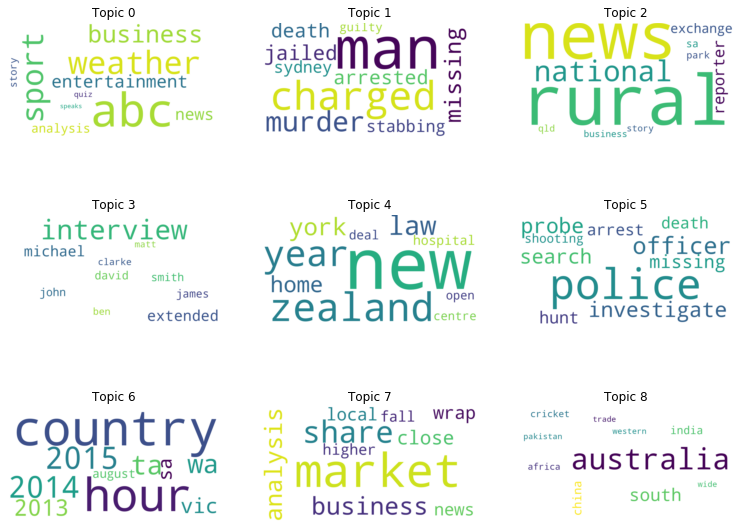

In [24]:
#Plot word cloud with subplot
fig, axes=plt.subplots(3,3,figsize=(13,10))

for i, ax in enumerate(axes.flatten()):
    getwordCloud(i,ax)
    
plt.savefig('img/wordcloud1.png', bbox_inches='tight')

plt.show()

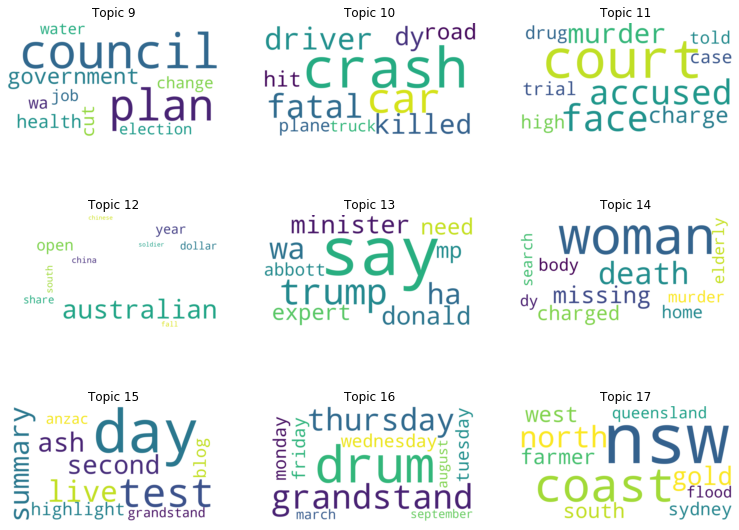

In [25]:
#Plot word cloud with subplot
fig, axes1=plt.subplots(3,3,figsize=(13,10))

for i, ax in enumerate(axes1.flatten(),9):
    getwordCloud(i,ax)

plt.savefig('img/wordcloud2.png', bbox_inches='tight')

plt.show()

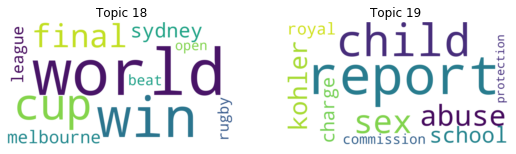

In [26]:
#Plot word cloud with subplot
fig, axes2=plt.subplots(1,2,figsize=(9,3))

for i, ax in enumerate(axes2.flatten(),18):
    getwordCloud(i,ax)

plt.savefig('img/wordcloud3.png', bbox_inches='tight')

plt.show()

In [27]:
#Remove topic 999 due to not belong to any of the top generated topic
remove_999=result[result['Topic number']==999].index
result.drop(remove_999,inplace=True)
result.head()

,Topic number,Frequency,Top words,Topic Title
0,0,6143,"[abc, weather, sport, business, entertainment, news, analysis, story, quiz, speaks]","Daily Update: Weather, Sport, Business, etc"
1,1,18591,"[man, charged, murder, missing, jailed, death, arrested, stabbing, sydney, guilty]",Criminality
2,2,11598,"[rural, news, national, reporter, exchange, sa, park, qld, business, story]",ABC National Rural News
3,3,22760,"[interview, extended, michael, david, john, smith, james, ben, clarke, matt]",ABC Extended Interview
4,4,15389,"[new, zealand, year, law, york, home, hospital, deal, centre, open]","NSW, NZ, Hospital News"


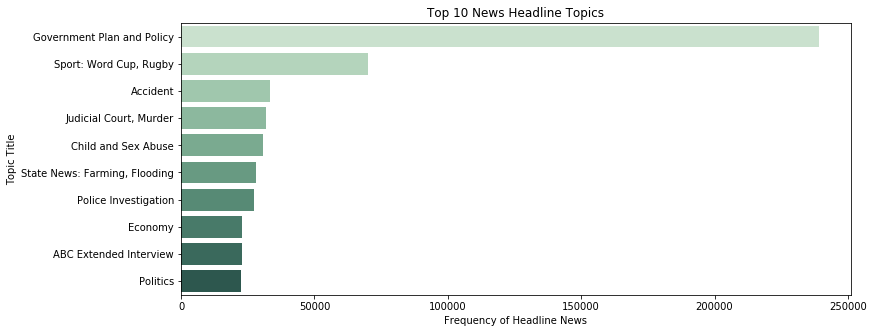

In [28]:
#Top Headline Graph
top_headline=result.sort_values('Frequency',ascending=False).reset_index(drop=True).head(10)
label=top_headline['Topic Title'].tolist()
plt.figure(figsize=(12, 5))
headline_graph=sns.barplot(x= "Frequency", y = "Topic Title", data = top_headline, palette=("ch:2.5,-.2,dark=.3"))
headline_graph.set_xlabel('Frequency of Headline News')
headline_graph.set_title('Top 10 News Headline Topics')


plt.savefig('img/top10topics.png',bbox_inches='tight')

# 2. National Conversation: Analysis by Traffic Views for May 2016
## 2.1. Load Data

In [29]:
data=pd.read_csv('data/abc/abcnewsmetadata.csv')
data.head()

,contentid,contentheadline,contentfirstpublished
0,1000050,Ozjet plane forced to land after wing failure,1/01/2008 10:08
1,1000058,More than 100 dead in Kenya riots,1/01/2008 5:44
2,1000066,Violence spreads across Kenya in the wake of Mwai Kibaki's triumph in the presidential elections.,26/05/2011 1:53
3,1000082,BOM celebrates 100 years,1/01/2008 10:37
4,1000094,Asbestos drug listed on PBS,1/01/2008 11:05


In [30]:
#Check for duplicate data
duplicatedata = data[data.duplicated()]
duplicatedata

,contentid,contentheadline,contentfirstpublished
6437,1218926,Fraser Island inquests considered single issue by coroner,22/01/2010 13:46
6439,1218928,Public warned of dodgy tradesmen,22/01/2010 14:02
22550,1884386,Watchdog says power wristbands a crock,23/12/2010 11:56
23055,1899800,Tasmania's pool lifesavers test their mettle,10/01/2011 12:38
23149,1901728,Teens have no fear due to brain changes: study,11/01/2011 23:02
23528,1910122,Rubbish piles mount in flood aftermath,18/01/2011 9:42
23641,1912944,King tide looms for flood-weary Brisbane,21/01/2011 7:55
24198,1926722,Man jailed over Indian toddler's death,2/02/2011 11:06
24459,1932048,Flood payouts: a question of entitlement,7/02/2011 8:14
24601,1934934,Too many pregnant Aboriginal women smoking,8/02/2011 15:46


In [31]:
#Remove duplicated data
data.drop_duplicates(keep='first',inplace=True)

In [32]:
#Read traffic data for web
web=pd.read_csv('data/abc/abcnewsweb.csv')
web.head()

,dt_hour,contentid,traffic
0,2016-05-01 00:00:00,7368898,1
1,2016-05-01 00:00:00,7373384,341
2,2016-05-01 00:00:00,7373410,459
3,2016-05-01 00:00:00,7373236,48
4,2016-05-01 00:00:00,5731280,149


In [33]:
#Found no duplication for web DF
duplicateweb = web[web.duplicated()]
duplicateweb

,dt_hour,contentid,traffic


In [34]:
#Drop unused columns. This report only focus on traffic
web.drop(columns='dt_hour',inplace=True)
web=web.groupby('contentid').sum()
web.rename(columns={'traffic':'trafic_web'},inplace=True)
web.head()

,trafic_web
contentid,
26912,8
26914,1
26916,4
26920,42
26922,7


In [35]:
#Load mobile traffic data
mobile=pd.read_csv('data/abc/abcnewsmobile.csv')
mobile.head()

,dt_hour,contentid,traffic
0,2016-05-01 00:00:00,7372736,1850
1,2016-05-01 00:00:00,7372800,357
2,2016-05-01 00:00:00,7100494,1
3,2016-05-01 00:00:00,7339062,23
4,2016-05-01 00:00:00,7343880,1


In [36]:
#Found no duplication for mobile DF
duplicatemobile = mobile[mobile.duplicated()]

#Drop unused columns. This report only focus on traffic
mobile.drop(columns='dt_hour',inplace=True)
mobile=mobile.groupby('contentid').sum()
mobile.rename(columns={'traffic':'trafic_mobile'},inplace=True)
mobile.head()

,trafic_mobile
contentid,
26920,13
26940,1
26950,3
26958,21
26972,1


In [37]:
#Load ios traffic data
ios=pd.read_csv('data/abc/abcnewsabcappios.csv')
ios.head()

#Found no duplication for ios DF
duplicateios = ios[ios.duplicated()]

#Drop unused columns. This report only focus on traffic
ios.drop(columns='dt_hour',inplace=True)
ios=ios.groupby('contentid').sum()
ios.rename(columns={'traffic':'trafic_ios'},inplace=True)
ios.head()

,trafic_ios
contentid,
4236048,1
4238379,1
4238536,1
4238605,1
4238616,2


In [38]:
#Read android data
android=pd.read_csv('data/abc/abcnewsappandroid.csv')
android.head()

#Found no duplication for android DF
duplicateandroid = android[android.duplicated()]

#Drop unused columns. This report only focus on traffic
android.drop(columns='dt_hour',inplace=True)
android=android.groupby('contentid').sum()
android.rename(columns={'traffic':'trafic_android'},inplace=True)
android.head()

,trafic_android
contentid,
387832,3
461686,2
487661,60
488028,5
530693,6


In [39]:
#Merge file
final_data=pd.merge(data,web,on='contentid',how="outer")
final_data=pd.merge(final_data,mobile,on='contentid',how="outer")
final_data=pd.merge(final_data,ios,on='contentid',how="outer")
final_data=pd.merge(final_data,android,on='contentid',how="outer")



#Remove content id without content headline - It is impossible to guess the content title.
final_data = final_data[final_data['contentheadline'].notna()]

#For not available value in traffic, fill na with 0
final_data.fillna(0,inplace=True)

final_data['Total Traffic']=final_data['trafic_web']+final_data['trafic_mobile']+final_data['trafic_ios']+final_data['trafic_android']

#drop not used columns
final_data.drop(columns=['trafic_web','trafic_mobile','trafic_ios','trafic_android','contentfirstpublished','contentid'],inplace=True)
final_data.head()

,contentheadline,Total Traffic
0,Ozjet plane forced to land after wing failure,1.0
1,More than 100 dead in Kenya riots,6.0
2,Violence spreads across Kenya in the wake of Mwai Kibaki's triumph in the presidential elections.,1.0
3,BOM celebrates 100 years,3.0
4,Asbestos drug listed on PBS,1.0


In [40]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 352713 entries, 0 to 355839
Data columns (total 2 columns):
contentheadline    352713 non-null object
Total Traffic      352713 non-null float64
dtypes: float64(1), object(1)
memory usage: 8.1+ MB


## 2.2. Data Processing: NMF

In [41]:
headlinelist1=final_data['contentheadline'].values.tolist()
headlinelist1[:10]

['Ozjet plane forced to land after wing failure',
 'More than 100 dead in Kenya riots',
 "Violence spreads across Kenya in the wake of Mwai Kibaki's triumph in the presidential elections.",
 'BOM celebrates 100 years',
 'Asbestos drug listed on PBS',
 "Ford's would-be assassin freed",
 'SA investigators say $50,000 house fire was deliberately lit',
 'Falls Festival wraps up at Marion Bay',
 'Mid-air scare blamed on new system',
 'SA dam saved']

In [42]:
#Tokenize and Lemmatisation

tokennizelist1=[]
lm = WordNetLemmatizer()

for sentence in headlinelist1:
    lemlist=[]
    sentence=sentence.lower()
    sentence=word_tokenize(sentence)
    for words in sentence:
        lemlist.append(lm.lemmatize(words))
    tokennizelist1.append(lemlist)
        
   

In [43]:
#join the tokennize list with space for tfidf vectorizer
headline1 = [' '.join(text) for text in tokennizelist1]

#Using tf-idf to process string and remove the stop words
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf1 = tfidf_vectorizer.fit_transform(headline1)

In [44]:
#Fit the NMF model
NUM_TOPICS=20
model1 = NMF(n_components=NUM_TOPICS, random_state=1, init='nndsvd')
W1=model1.fit_transform(tfidf1)
H1=model1.components_

In [45]:
#The topics and the words associated with the topic.
#Create the list for topic words and its frequency
nmf_topic1=[]
words_probability1=[]

def print_top_words1(model, feature_names, n_top_words):
    for i, topic in enumerate(H1):
        print ("Topic #%d: " % i)
        print([(feature_names[i], topic[i]/sum(topic))
                        for i in topic.argsort()[:-n_top_words - 1:-1]])
        nmf_topic1.append([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]) 
        words_probability1.append([topic[i]/sum(topic)
                        for i in topic.argsort()[:-n_top_words - 1:-1]])

In [46]:
tfidf_feature_names1 = tfidf_vectorizer.get_feature_names()
print_top_words1(W1, tfidf_feature_names1, n_top_words=10)

Topic #0: 
[('man', 0.19725830890747334), ('jailed', 0.027355293109879286), ('charged', 0.017099202002280794), ('dy', 0.01446704359365186), ('missing', 0.013691516839016211), ('attack', 0.010878673368453958), ('arrested', 0.010467554232131844), ('guilty', 0.009471937536623742), ('stabbing', 0.00813588478023376), ('shooting', 0.008123396779320774)]
Topic #1: 
[('government', 0.014377293461916182), ('nsw', 0.011376750725357933), ('plan', 0.008277597508187086), ('council', 0.006739079704971145), ('health', 0.00558823759594357), ('water', 0.004836703773799941), ('cut', 0.0047190342775664485), ('service', 0.004652607668528831), ('change', 0.004650380668488364), ('federal', 0.004433334647606245)]
Topic #2: 
[('police', 0.15433367010001997), ('officer', 0.019378251865636038), ('investigate', 0.013665242085977126), ('drug', 0.012629440563677255), ('shooting', 0.011306384266938363), ('search', 0.010424387337811009), ('missing', 0.010015777467442604), ('raid', 0.009428061989629893), ('probe', 0.

In [47]:
#Get the topic and its probability for each of the headline.
#If there is no probability in the result, it means it belongs to other topic (not the top 20 topics)

NMF_result1=W1.tolist()
topicnum1=[]
topic_probability1=[]

for listline in NMF_result1:
    m=max(listline)
    if m==0:
        topicnum1.append(999)
        topic_probability1.append(0)
        
    else:
        topicnum1.append([i for i, j in enumerate(listline) if j == m][0])
        topic_probability1.append([(j/sum(listline)) for i, j in enumerate(listline) if j == m][0])
    

topicnum1[:10]

[4, 4, 1, 13, 7, 10, 17, 18, 5, 1]

In [48]:
#Check the length of the list.
print(len(headlinelist1))
print(len(topicnum1))
print(len(topic_probability1))

352713
352713
352713


In [49]:
#Testing
index=5445
print("Headline: ", headlinelist1[index])
print("Topic number: ", topicnum1[index])
print("Probability: ", topic_probability1[index])

if topicnum1[index]>NUM_TOPICS:
    print('No Topic words: Headline does not belong to any of topics')
else:
    print('Topic words:',nmf_topic1[topicnum1[index]])


Headline:  Storms hit southern Queensland
Topic number:  12
Probability:  0.7622067903976707
Topic words: ['queensland', 'coast', 'north', 'gold', 'west', 'south', 'central', 'far', 'east', 'qld']


In [50]:
final_data['Topic number']=topicnum1
final_data['Probability']=topic_probability1
final_data

,contentheadline,Total Traffic,Topic number,Probability
0,Ozjet plane forced to land after wing failure,1.0,4,0.622544
1,More than 100 dead in Kenya riots,6.0,4,0.238430
2,Violence spreads across Kenya in the wake of Mwai Kibaki's triumph in the presidential elections.,1.0,1,0.657093
3,BOM celebrates 100 years,3.0,13,0.985136
4,Asbestos drug listed on PBS,1.0,7,0.439014
5,Ford's would-be assassin freed,1.0,10,0.261723
6,"SA investigators say $50,000 house fire was deliberately lit",2.0,17,0.497642
7,Falls Festival wraps up at Marion Bay,1.0,18,0.215648
8,Mid-air scare blamed on new system,1.0,5,0.877402
9,SA dam saved,3.0,1,0.777500


In [51]:
#Creating the name of the topic based on the keywords.
topic_title1=pd.DataFrame()
topic_title1['Topic number']=range(NUM_TOPICS)
topic_title1['Top words']=nmf_topic1
topic_title1['Topic Title']=['Criminality',
                             'Government Plan and Policy',
                             'Arrest and Investigation',
                             'ABC Daily News Hour',
                             'Accident',
                             'NSW, NZ news',
                             'Cricket World Cup',
                             'Court and Judiciary',
                             'War',
                             'Shooting in Sydney',
                             'Violence and Missing Persons',
                             'Child and Sex Abuse',
                             'Queensland News',
                             'Imprisonment',
                             'Murder and Accusation',
                            'Death and Custody',
                            'Education',
                            'Shark Attack',
                            'Sport: Melbourne Cup,etc',
                            'Politics']
topic_title1

,Topic number,Top words,Topic Title
0,0,"[man, jailed, charged, dy, missing, attack, arrested, guilty, stabbing, shooting]",Criminality
1,1,"[government, nsw, plan, council, health, water, cut, service, change, federal]",Government Plan and Policy
2,2,"[police, officer, investigate, drug, shooting, search, missing, raid, probe, arrest]",Arrest and Investigation
3,3,"[second, 90, news, weather, business, sport, week, abc, exchange, test]",ABC Daily News Hour
4,4,"[crash, car, fatal, killed, driver, road, dy, plane, truck, injured]",Accident
5,5,"[new, zealand, wale, south, papua, law, york, guinea, hospital, open]","NSW, NZ news"
6,6,"[australia, day, south, western, world, test, china, cup, cricket, national]",Cricket World Cup
7,7,"[court, face, accused, drug, told, charge, supreme, hears, high, alleged]",Court and Judiciary
8,8,"[australian, south, open, soldier, war, world, dollar, market, industry, west]",War
9,9,"[sydney, house, harbour, western, west, home, shooting, siege, hobart, south]",Shooting in Sydney


In [52]:
result1=final_data.groupby('Topic number').agg({'contentheadline':'count', 'Total Traffic': 'sum'})
result1=pd.merge(result1,topic_title1, on='Topic number',how='outer')
result1.rename(columns={'contentheadline':'Frequency'},inplace=True)
result1

,Topic number,Frequency,Total Traffic,Top words,Topic Title
0,0,4881,1747406.0,"[man, jailed, charged, dy, missing, attack, arrested, guilty, stabbing, shooting]",Criminality
1,1,105420,33796910.0,"[government, nsw, plan, council, health, water, cut, service, change, federal]",Government Plan and Policy
2,2,13512,3022252.0,"[police, officer, investigate, drug, shooting, search, missing, raid, probe, arrest]",Arrest and Investigation
3,3,3626,2111480.0,"[second, 90, news, weather, business, sport, week, abc, exchange, test]",ABC Daily News Hour
4,4,16458,4619658.0,"[crash, car, fatal, killed, driver, road, dy, plane, truck, injured]",Accident
5,5,12524,3683770.0,"[new, zealand, wale, south, papua, law, york, guinea, hospital, open]","NSW, NZ news"
6,6,13275,3818354.0,"[australia, day, south, western, world, test, china, cup, cricket, national]",Cricket World Cup
7,7,11217,3012888.0,"[court, face, accused, drug, told, charge, supreme, hears, high, alleged]",Court and Judiciary
8,8,16482,6019410.0,"[australian, south, open, soldier, war, world, dollar, market, industry, west]",War
9,9,9982,3330619.0,"[sydney, house, harbour, western, west, home, shooting, siege, hobart, south]",Shooting in Sydney


In [53]:
print('The number of headline in datafile is ',final_data.shape[0])
print('The frequency count in the data is ',(sum(result1['Frequency'])))
print('The total traffic in the final data frame is ',sum(final_data['Total Traffic']))
print('The total traffic in the result data frame is ',sum(result1['Total Traffic']))


The number of headline in datafile is  352713
The frequency count in the data is  352713
The total traffic in the final data frame is  112824034.0
The total traffic in the result data frame is  112824034.0


In [54]:
#Data frame for the words frequency
words_frequency1=topic_title1['Top words'].apply(pd.Series)
words_frequency1=words_frequency1.merge(topic_title1, left_index = True, right_index = True)
words_frequency1.drop(columns='Top words',inplace=True)
words_frequency1=words_frequency1.melt(id_vars = ['Topic number', 'Topic Title'], value_name = "Top words")
words_frequency1.drop("variable", axis = 1,inplace=True)


words_frequency1=words_frequency1.sort_values('Topic number')
words_frequency1

,Topic number,Topic Title,Top words
0,0,Criminality,man
60,0,Criminality,dy
140,0,Criminality,guilty
20,0,Criminality,jailed
100,0,Criminality,attack
180,0,Criminality,shooting
40,0,Criminality,charged
80,0,Criminality,missing
160,0,Criminality,stabbing
120,0,Criminality,arrested


In [55]:
#Melt words corresponding weight to add to word frequency df
words_probability1
df1 = pd.Series( (v for v in words_probability1) )
probability1=df1.apply(pd.Series)
probability1=probability1.merge(topic_title1, left_index = True, right_index = True)
probability1.drop(columns='Top words',inplace=True)
probability1=probability1.melt(id_vars = ['Topic number', 'Topic Title'], value_name = "Words Weight")
probability1.drop("variable", axis = 1,inplace=True)

probability1=probability1.sort_values('Topic number')
#Add to word_frequency df
words_frequency1['Words Weight']=probability1['Words Weight']

In [56]:
words_frequency1=words_frequency1.sort_values(['Topic number','Words Weight'],ascending=(True,False))
words_frequency1.reset_index(inplace=True,drop=True)
words_frequency1

,Topic number,Topic Title,Top words,Words Weight
0,0,Criminality,man,0.197258
1,0,Criminality,jailed,0.027355
2,0,Criminality,charged,0.017099
3,0,Criminality,dy,0.014467
4,0,Criminality,missing,0.013692
5,0,Criminality,attack,0.010879
6,0,Criminality,arrested,0.010468
7,0,Criminality,guilty,0.009472
8,0,Criminality,stabbing,0.008136
9,0,Criminality,shooting,0.008123


## 2.3. Visualisation

In [57]:
#Function to create wordcloud. First create dictionary of word with word weight, and then plot it.
def getwordCloud1(topicnum,ax):
    topic=words_frequency1[words_frequency1['Topic number']==topicnum]
    dictionary=pd.Series(topic['Words Weight'].values,topic['Top words'].values).to_dict()
    wc = WordCloud(width=1100, height=600, max_words=200,background_color='white').generate_from_frequencies(dictionary)
    ax.imshow(wc, interpolation='bilinear')
    ax.axis('off')
    ax.set_title('Topic %s'%topicnum)

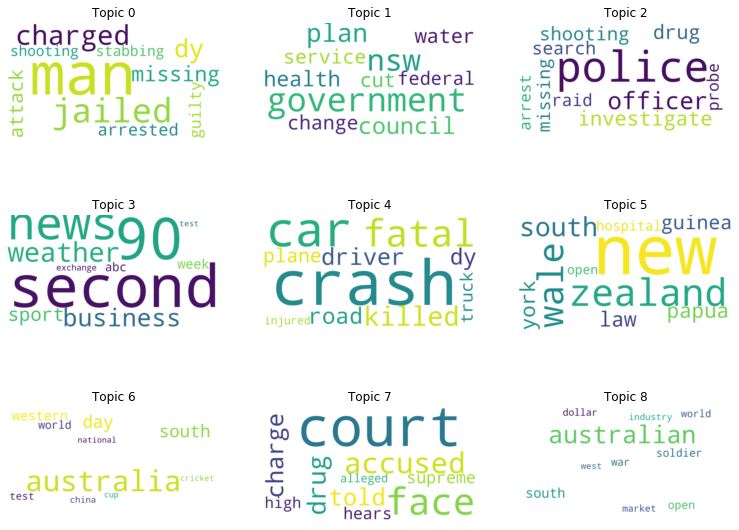

In [58]:
#Plot word cloud with subplot
fig, axes4=plt.subplots(3,3,figsize=(13,10))

for i, ax in enumerate(axes4.flatten()):
    getwordCloud1(i,ax)
    
plt.savefig('img/wordcloud4.png', bbox_inches='tight')

plt.show()

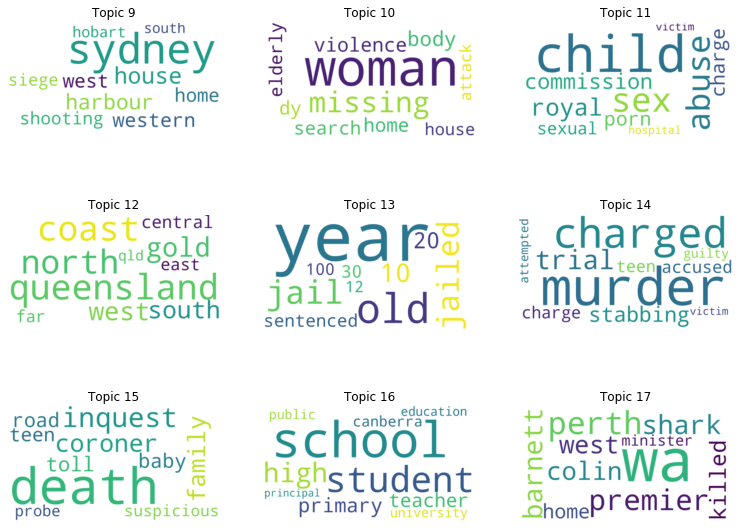

In [59]:
#Plot word cloud with subplot
fig, axes5=plt.subplots(3,3,figsize=(13,10))

for i, ax in enumerate(axes5.flatten(),9):
    getwordCloud1(i,ax)

plt.savefig('img/wordcloud5.png', bbox_inches='tight')

plt.show()

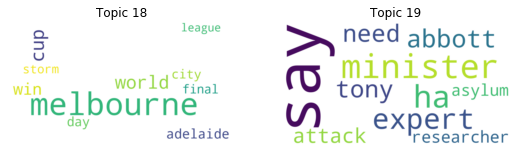

In [60]:
#Plot word cloud with subplot
fig, axes6=plt.subplots(1,2,figsize=(9,3))

for i, ax in enumerate(axes6.flatten(),18):
    getwordCloud1(i,ax)

plt.savefig('img/wordcloud6.png', bbox_inches='tight')

plt.show()

In [61]:
#Remove topic 999
remove999=result1[result1['Topic number']==999].index
result1.drop(remove999,inplace=True)
result1.sort_values('Frequency')

,Topic number,Frequency,Total Traffic,Top words,Topic Title
3,3,3626,2111480.0,"[second, 90, news, weather, business, sport, week, abc, exchange, test]",ABC Daily News Hour
0,0,4881,1747406.0,"[man, jailed, charged, dy, missing, attack, arrested, guilty, stabbing, shooting]",Criminality
10,10,7214,3477561.0,"[woman, missing, body, violence, home, dy, search, elderly, house, attack]",Violence and Missing Persons
9,9,9982,3330619.0,"[sydney, house, harbour, western, west, home, shooting, siege, hobart, south]",Shooting in Sydney
11,11,10072,3004133.0,"[child, sex, abuse, royal, commission, porn, charge, sexual, hospital, victim]",Child and Sex Abuse
17,17,10119,2461746.0,"[wa, perth, premier, barnett, shark, colin, west, killed, home, minister]",Shark Attack
16,16,10161,2626249.0,"[school, student, high, primary, teacher, canberra, university, public, education, principal]",Education
14,14,10403,2335551.0,"[murder, charged, trial, stabbing, accused, charge, teen, guilty, attempted, victim]",Murder and Accusation
15,15,10754,3936533.0,"[death, inquest, coroner, family, toll, baby, road, teen, suspicious, probe]",Death and Custody
7,7,11217,3012888.0,"[court, face, accused, drug, told, charge, supreme, hears, high, alleged]",Court and Judiciary


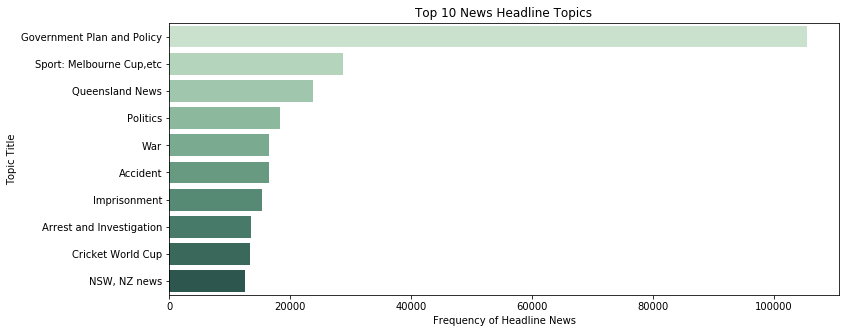

In [62]:
#Top Headline Graph
top_headline1=result1.sort_values('Frequency',ascending=False).reset_index(drop=True).head(10)

plt.figure(figsize=(12, 5))
headline_graph1=sns.barplot(x= "Frequency", y = "Topic Title", data = top_headline1, palette=("ch:2.5,-.2,dark=.3"))
headline_graph1.set_xlabel('Frequency of Headline News')
headline_graph1.set_title('Top 10 News Headline Topics')

plt.savefig('img/top10topics1.png',bbox_inches='tight')
plt.show()

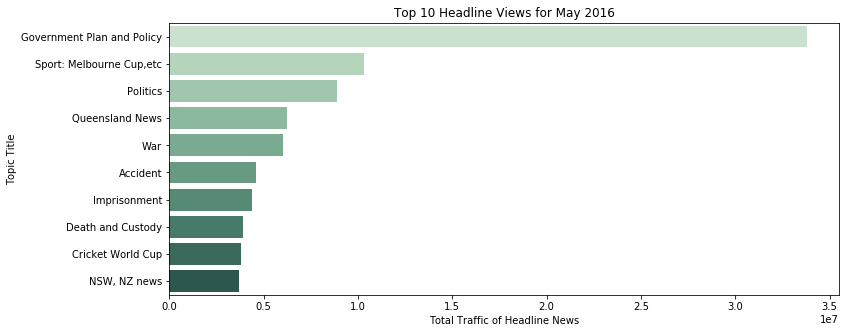

In [63]:
#Headline with the most traffic
top_traffic=result1.sort_values('Total Traffic',ascending=False).reset_index(drop=True).head(10)

plt.figure(figsize=(12, 5))
headline_graph2=sns.barplot(x= "Total Traffic", y = "Topic Title", data = top_traffic, palette=("ch:2.5,-.2,dark=.3"))
headline_graph2.set_xlabel('Total Traffic of Headline News')
headline_graph2.set_title('Top 10 Headline Views for May 2016')

plt.savefig('img/top10traffic1.png',bbox_inches='tight')
plt.show()

In [64]:
qld_freq=result1.loc[result1['Topic Title']=='Queensland News','Frequency'].iloc[0]
pol_freq=result1.loc[result1['Topic Title']=='Politics','Frequency'].iloc[0]
perc_higher=(qld_freq-pol_freq)/pol_freq*100
print("Frequency of Queensland News topic is higher by %.2f %% compare to frequency of politics topic."%perc_higher,)


qld_trf=result1.loc[result1['Topic Title']=='Queensland News','Total Traffic'].iloc[0]
pol_trf=result1.loc[result1['Topic Title']=='Politics','Total Traffic'].iloc[0]
perc_trfhigher=-((qld_trf-pol_trf)/pol_trf*100)
print("Traffic views of Queensland news topic is lower by %.2f %% compare to traffic views of politics topic."%perc_trfhigher)

Frequency of Queensland News topic is higher by 30.43 % compare to frequency of politics topic.
Traffic views of Queensland news topic is lower by 29.60 % compare to traffic views of politics topic.


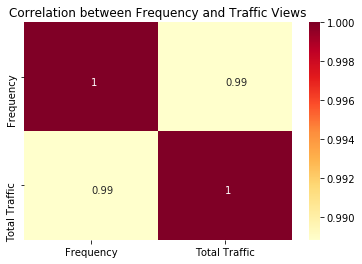

In [65]:
#Colour map for frequency and Total Traffic
df_heatmap=result1[['Frequency','Total Traffic']]
corrMatrix = df_heatmap.corr()
akws = {"ha": 'left',"va": 'top'}
heatmap=sns.heatmap(corrMatrix, annot=True,annot_kws=akws,cmap="YlOrRd")
heatmap.set_title('Correlation between Frequency and Traffic Views')
plt.savefig('img/heatmap.png',bbox_inches='tight')
plt.show()

# 3. Business Insight

## 3.1. Introduction 

News articles have always been one of the paramount features in people daily lives regardless of any countries or states. They are updated to connect readers with the recent and important events. Every news article has a news headline which indicates the respective content of the news articles. News headlines may describe the current situation in the world. For example, [ABC News](https://www.abc.net.au/news/), [CNN](https://edition.cnn.com/) and other news agencies currently have many news headlines about coronavirus pandemic. This may suggest the severity of coronavirus disease. Analysing the news headline may give understanding of the types of headline that interest people. Furthermore, news headline may also be a signal of the events which become the national conversation.

This report will explore the past news headlines of ABC news, the data were collected from [Kaggle](https://www.kaggle.com/therohk/million-headlines). The report aims to provide insight on the top headline topics for the past decade in Australia. The business concerns which this report intend to analyse are:
   1. What is the top Australian news topics over the past 10 years? 
   2. What might be the national conversation by analysing the news headlines? In attempt to analyse the national conversation, this report will collect additional data to supplement the analysis. The data is collected from [Australia Government Portal](https://data.gov.au/dataset/ds-dga-316060ae-e49d-4e39-949a-ed3fdaede18d/details?q=abc%20news) which provides the additional information on the traffic of the news headlines.
   
Addressing these questions are important to understand whether ABC news has provided meaningful news topics which corresponds to the interest of the readers. The result from this report may give an insight to ABC news to retain or adjust their headlines topic to the readers demand. As a result, ABC will be benefited by getting more customers base compare to its competitor. Additionally, addressing the national conversation will help other businesses to understand their customers’ need. Business will be benefited by acquiring new information on the business opportunity which may be the interest of the customers.


## 3.2. Analysing News Headlines: Application of NMF Topic Modelling
Non-negative Matrix Factorization (NMF) is one of the popular topic modelling algorithms to analyse the structure of the data and cluster the keywords to form topics. Alongside with NMF, Latent Dirichlet allocation (LDA) is another algorithm which is very popular for topic modelling. This report will utilise NMF to derive to the news topics in ABC News. The main reason behind this was the key words produced by MMF were more meaningful to derive to the topics in comparison to the LDA result.

This report found the top 20 topics from analysing the past 10 years data. NMF algorithm has clustered the following keywords:
<img src="img/wordcloud1.png">

<img src="img/wordcloud2.png">

<img src="img/wordcloud3.png">

The size of the words depends on the words weight in each topic. For example, topic 0 key words are on abc, weather, sport, business, entertainment, news. The NMF algorithm will only cluster the keywords which may lead to the topic. It is unable to provide the topic title for the clustered words. Therefore, human should intervene and analyse the keywords to derive to the possible topics. From topic 0, the possible topic title will be ABC daily updates, including weather, business, sport, and entertainment updates. From the above keywords, the following topic title were obtained.


| Topic | Topic Title                                 |
|-------|---------------------------------------------|
| 0     | Daily Update: Weather, Sport, Business, etc |
| 1     | Criminality                                 |
| 2     | ABC National Rural News                     |
| 3     | ABC Extended Interview                      |
| 4     | NSW, NZ, Hospital News                      |
| 5     | Police Investigation                        |
| 6     | ABC Country Hour                            |
| 7     | Economy and Business                        |
| 8     | Bilateral Relation                          |
| 9     | Government Plan and Policy                  |
| 10    | Accident                                    |
| 11    | Judicial Court, Murder                      |
| 12    | Economy                                     |
| 13    | Politics                                    |
| 14    | Death and Missing Person                    |
| 15    | Cricket Ashes                               |
| 16    | ABC The Drum                                |
| 17    | State News: Farming, Flooding               |
| 18    | Sport: Word Cup, Rugby                      |
| 19    | Child and Sex Abuse                         |


Topic 0, 2, 3, 6 and 16 from above table were the ABC news weekly updates. For example, [ABC Extended Interview](https://www.abc.net.au/news/programs/the-business/2019-12-05/extended-interview-with-ken-henry/11771938) is an interview program with successful people and is being updated three times a week. After generating top 20 topics, each headline news over the last decade will be assigned to 20 topics. Then, the frequency of each topic will be calculated to find the top 10 topics in ABC news Australia. The result of the findings is in the graph below.

<img src="img/top10topics.png">

ABC News focused primarily on the government policy which includes government election, jobs, health, council policies. The government policies took half proportion of the headline news over the past 10 years. This showed that Australians worried on the government plan and policies which might affect them. For example, government policies on jobs will directly impact their lives. If the news was on government to increase tax rate in Australia, this would definitely concern Australians. Therefore, ABC news reported more on these issues. 

Next, the second most used topic was regarding to sports. Sports such as rugby, Melbourne cup, cricket world cup were very popular to be the headline topics. It illustrated that entertainment was an important aspect in Australia. This can also show the types of sports that Australian like and an opportunity for companies to open business in this area.

Most of the popular topics after sports were unpleasant news ranging from accident, murder, child and sex abuse, flooding and police investigation. When combining the frequency of these topics together, the frequencies of the topics were higher than sport news. It showed that ABC news had more distressing news articles compare to good news such as sport. By looking at this trend, it was an opportunity for business to build a good home or office security system to prevent criminality from happening. 


## 3.3. Analysis of National Conversation: ABC News Traffic during May 2016

The exploration solely on the frequency of the news headlines may not assist in finding out whether the topics become a widely discussed topic. For example, the analysis from the previous part found that ABC Extended Interview was inn of the top 10 headline topics. However, ABC Extended Interview is updated three times a week by ABC. It is one of the recurring programs in ABC and some readers might not be watching it every week or interested in the program. Therefore, the frequency of the headline will not illustrate the national conversation. National conversation is the hot discussed topics in a country. The analysis for national conversation should include number of views and comments of the news articles. It can be further expanded to the number of likes and trending topics in social media such as Twitter. 

This report utilises additional data from [Australia Government Portal](https://data.gov.au/dataset/ds-dga-316060ae-e49d-4e39-949a-ed3fdaede18d/details?q=abc%20news). The data provides information on news headlines and number of views across ABC news platform for the month of May 2016. It gives information on the number of views for each headline for mobile web user, web user, IOS user and android user. Analysis of the dataset will give information on the most-read news topics and topic of interest for readers. The following keywords are discovered by using NMF.

<img src="img/wordcloud4.png">

<img src="img/wordcloud5.png">

<img src="img/wordcloud6.png">

The following topic title can be derived from the key words above:

| Topic | Topic Title                                 |
|-------|---------------------------------------------|
| 0     | Criminality                                 |
| 1     | Government Plan and Policy                  |
| 2     | Arrest and Investigation                    |
| 3     | ABC Daily News Hour                         |
| 4     | Accident                                    |
| 5     | NSW, NZ news                                |
| 6     | Cricket World Cup                           |
| 7     | Court and Judiciary                         |
| 8     | War                                         |
| 9     | Shooting in Sydney                          |
| 10    | Violence and Missing Persons                |
| 11    | Child and Sex Abuse                         |
| 12    | Queensland News                             |
| 13    | Imprisonment                                |
| 14    | Murder and Accusation                       |
| 15    | Death and Custody                           |
| 16    | Education                                   |
| 17    | Shark Attack                                |
| 18    | Sport: Melbourne Cup,etc                    |
| 19    | Politics                                    |

The report identified the top topics by the frequency of topics and the sum of the traffic views.

<img src="img/top10topics1.png">

<img src="img/top10traffic1.png">

<img src="img/heatmap.png">


This report found that the frequency of the headline news topics in this dataset and previous dataset were very similar. The first and second most popular topics by its frequency were government plan and sport respectively. This report also found out that the top topics led to similar result to the number of the views. The frequency of topic headlines had a positive correlation with the number of views with correlation coefficient of 0.99. This might indicate that the higher the frequency of a news headlines topic, the higher chance of it being the national conversation. The top national conversation based on the number of views was on topic such as Government Plan and Policies. On the other hand, some inconsistencies were found from the analysis. The news topic of Queensland news had a higher frequency in comparison to politics topic by 30%. However, politics topic had higher views than Queensland news by 29%. This might indicate that people more prefer to read news about politics, and Australian would pay more attention on this topic. This became a signal for ABC news to pay more attention and put more politic news to satisfy its customers and keep up to date with the national conversation.

Displeasing news topics such as war, accident, imprisonment and death had a high aggregate of traffics. This showed that nation was concerned about humanity, especially on the crimes against humanity. People kept updated with this violence news by reading or watching the news and brought the news up as the conversation topic. 

Looking at the current situation, the unprecedented COVID-19 pandemic situation is predicted to be both national and global conversation. By analysing the nature behind high traffic to news headlines, the pandemic situation was a displeasing event which affected the whole nations. The lockdown and restrictions were the government policies to stop the spread of virus. These restrictions gave a negative impact such as job losses to millions of people not only in Australia, but also across the words. Moreover, the news articles of this pandemic are very frequent. Therefore, this pandemic is obviously the current national conversation.


# 3.4. Conclusion

This report found that the top three Australia news topic are Government Policies, Sport and Accidents for the last decade. The number of headlines of Government policies topic was extremely higher in comparison to other topics. It took over half of the headline news in ABC news service. The views count for this topic was also the highest. This suggested that Australian would read the news which might have impact to their daily lives. For example, changes in tax rate will affect their disposable income, hence, they would pay attention to this topic.

This report discovered that the higher number of frequencies of news headline would correspond to the higher number of views. The correlation between the variables were very strong. However, some topics might not have the similar trend. For example, topic related to politic had a higher view compare to Queensland topic even though its frequency was lower. This would be a signal for ABC news to review their news articles and provide more news about politics in the future. 

Companies can also open more businesses in sports such as cricket, rugby. Additionally, security system such as security camera, secure door locks will be a good business idea to focus on. 


# 3.5. Further Exploration

Further exploration may focus on the analysis of sentiment such as number of likes and trending topics in the social media to have an in depth understanding on the national conversation. Furthermore, this report only analyses on Australia news topics. Further exploration can be done for other countries' news topic to analyse the global conversation. For example, COVID-19 pandemic may be the current national and global conversation topic. It is widely discussed across all countries.